# Implementation of a simple Linear Regression Model.

### Importing Modules

In [1]:
# Module Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load Dataset and Description

In [2]:
# Load dataset saved locally
df = pd.read_csv('Ecommerce Customers.csv')

## Exploratory Data Analysis

### Initial Data Inspection

In [3]:
# Display basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
# Quick Summary of the Dataset
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
# Display first 5 rows of the dataframe
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Visualising the Data

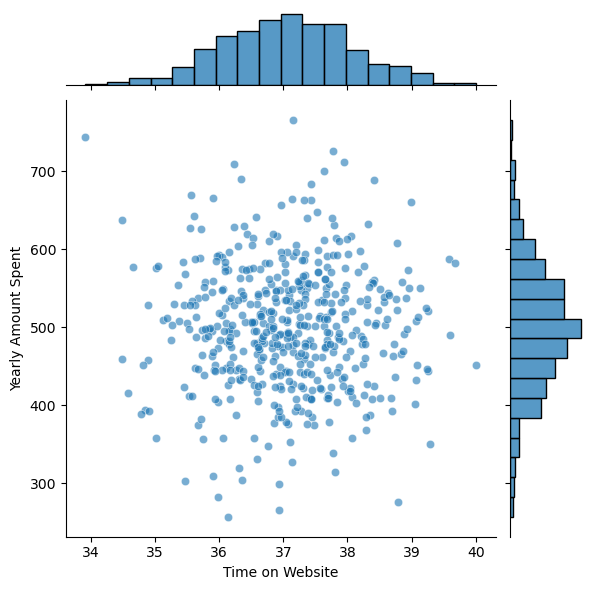

In [11]:
# Plot a jointplot to visualise the relationship between the target and time on website
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df, alpha=0.6)
plt.show()

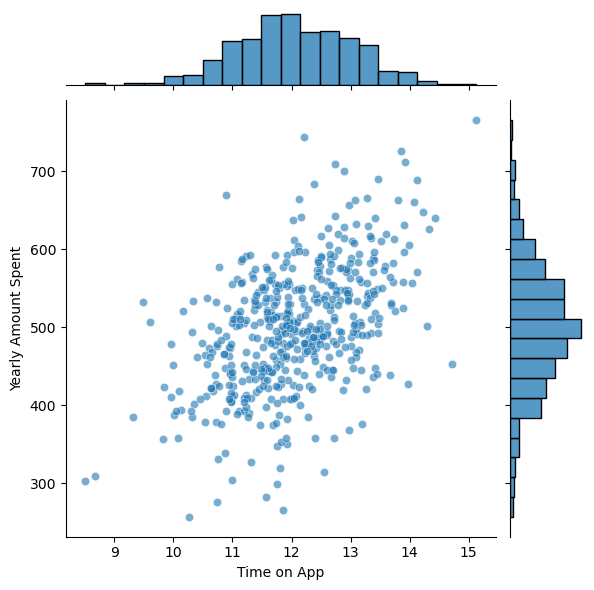

In [12]:
# Plot a jointplot to visualise the relationship between the target and time on app
sns.jointplot(
    x='Time on App',
    y='Yearly Amount Spent',
    data=df,
    alpha=0.6
)
plt.show()

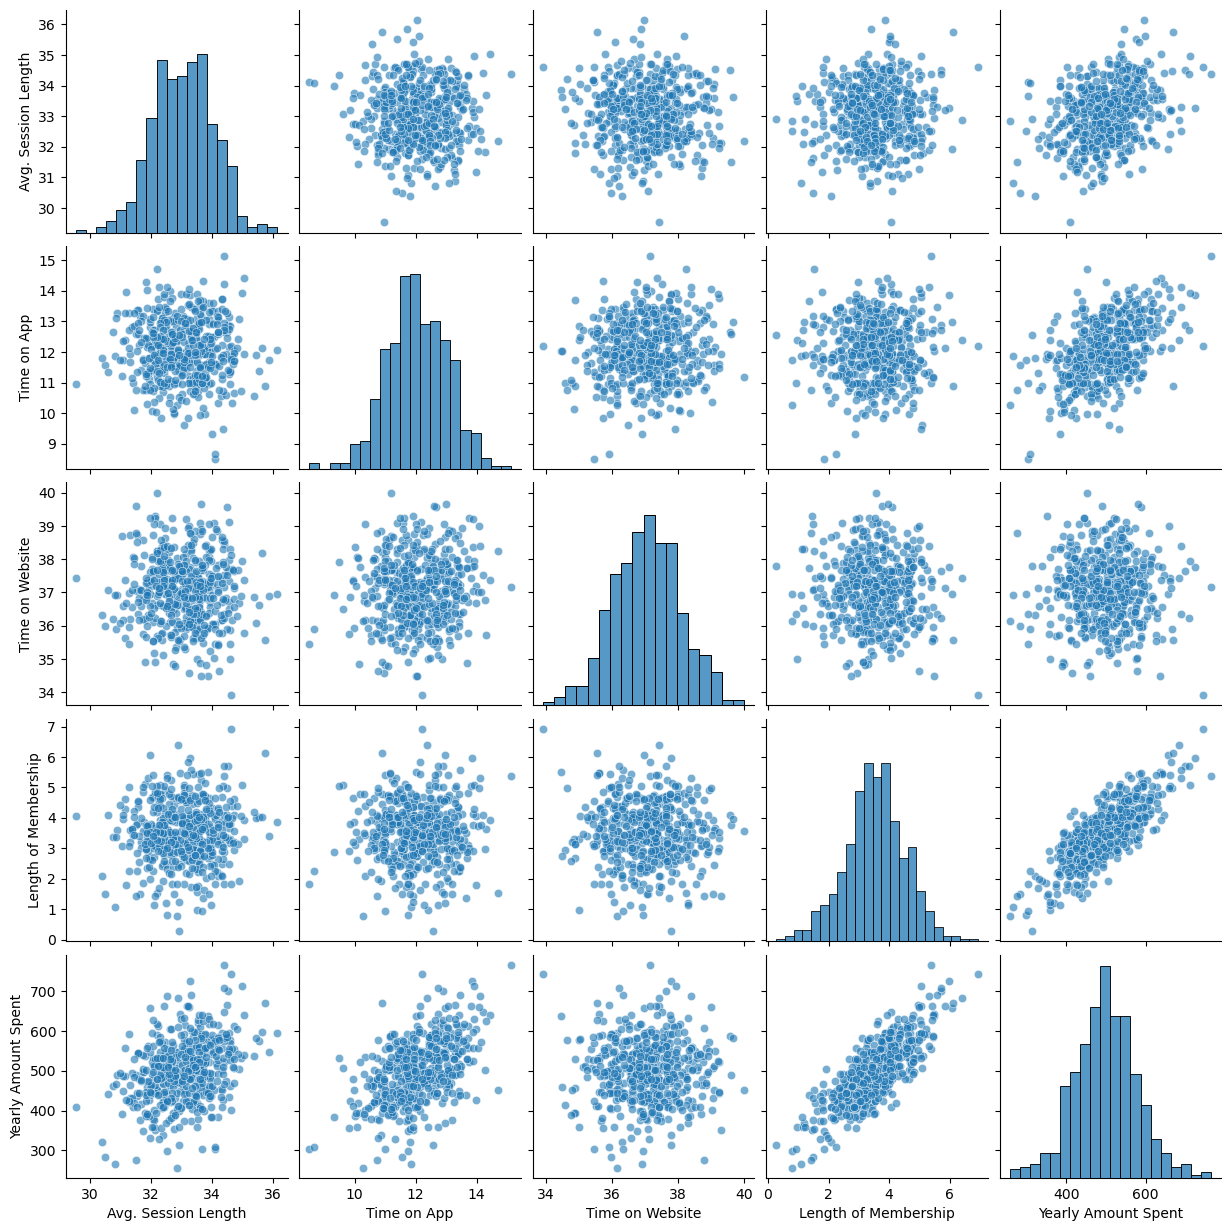

In [19]:
# Plot a pairplot to visualise the relationship between the features
sns.pairplot(df, plot_kws={'alpha': 0.6})
plt.show()

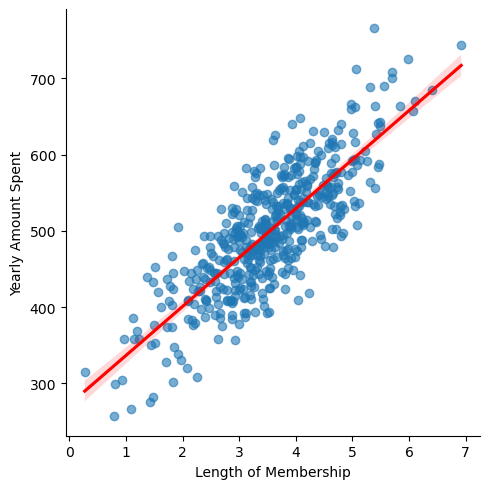

In [24]:
# Plot a linear model plot to visualise the relationship between the Length of Membership and the target
sns.lmplot(
    x='Length of Membership', 
    y='Yearly Amount Spent', 
    data=df, 
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.show()

## Model Training

### Import Modules

In [47]:
# Import necessary modules
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

### Prepare the Dataset

In [27]:
# Split the dataset into training and testing sets
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']] # Features
y = df['Yearly Amount Spent'] # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Split the dataset into training and testing sets

### Train the Model

In [34]:
# Create a Linear Regression model
lm = LinearRegression()
# Train the model on training set 
lm.fit(X_train, y_train)

### Make Predictions

In [37]:
# Make predictions on testing set
y_pred = lm.predict(X_test)

In [45]:
# Print the coefficients and intercept
print(f'Coefficients: {lm.coef_}')
print(f'Intercept: {lm.intercept_}')

Coefficients: [25.72425621 38.59713548  0.45914788 61.67473243]
Intercept: -1050.653674664572


### Visualising the predictions vs actual values

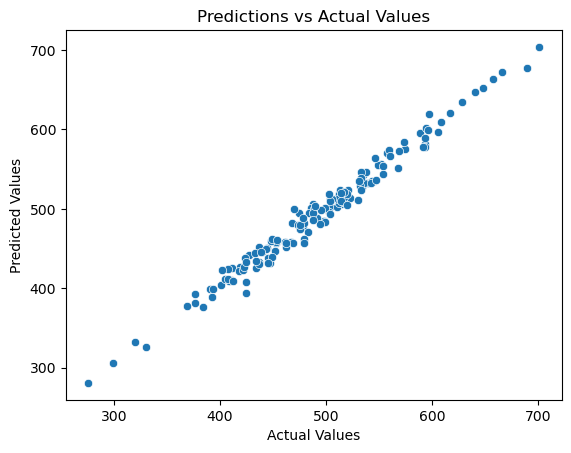

In [39]:
# Plot predictions vs actual values
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.show()

### Evaluating the Model

In [50]:
# Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred)}')

Mean Squared Error: 103.9155413650334
Mean Absolute Error: 8.42609164143211
Root Mean Squared Error: 10.193897260863158


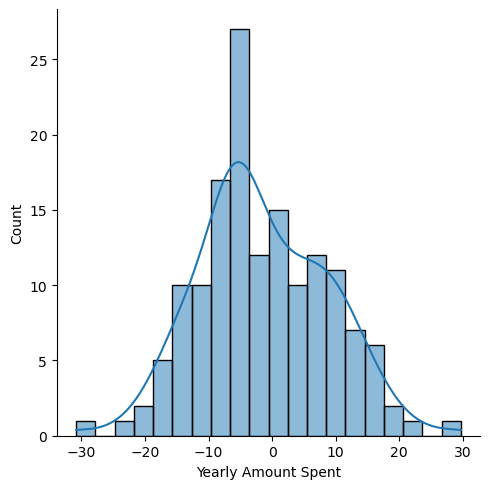

In [65]:
# Analysing the residuals
residuals = y_test - y_pred
sns.displot(residuals, bins=20, kde=True)
plt.show()


## Conclusion

### Visual Indicators



   - The scatter plot of predicted vs actual values shows a strong linear relationship with points clustered tightly around the diagonal, indicating good prediction accuracy
   
   - The histogram of residuals shows a normal distribution with mean close to 0, indicating that the model is unbiased

### Numerical Metrics


   - The presence of Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) provides a comprehensive view of the model's performance
   
   - The model has a Root Mean Squared Error of 10.19, indicating that on average, the predictions are off by \$10.19. Taking into account the mean yearly amount spend of \$499.19, this is a 2% error margin.

### Feature Importance


   - The model coefficients and intercept show how each feature contributes to the predictions. The length of membership has the highest coefficient, indicating that it is the most important feature in predicting the yearly amount spent. This corresponds with the pairplot visualisation which shows a strong relationship between the length of membership and the yearly amount spent.

   - The lowest coefficient is for the time on website, indicating that it is the least important feature in predicting the yearly amount spent.

Overall, based on the visualizations and the presence of a normal distribution in residuals, this appears to be a well-performing linear regression model.